In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.07797833, -0.47564422, -0.43022194,  0.6119684 ,  0.64106611,
         0.50120924,  0.64102822,  0.49887781, -0.30547166, -0.07362558],
       [-0.72942457, -0.14350416, -0.31764989, -0.01054149, -0.19235852,
        -0.16822292, -0.548816  ,  0.42539109,  1.08224206, -1.92891033]])

In [4]:
test_Features[:2]

array([[-0.37864583, -0.54429293, -0.44566885,  0.07315273, -0.12810971,
        -0.23466888, -0.82657952,  0.49160837,  0.70926866,  0.11346171],
       [-0.63224477, -0.46276373, -0.45921136, -0.03023424, -0.12358515,
         0.65662309,  0.06783016,  0.33250637, -0.90480275, -1.06626811]])

In [5]:
train_Label[:4]

array([1, 1, 0, 0])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([0, 1, 1, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=30*2,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                660       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [15]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 1s - loss: 0.6768 - acc: 0.7131 - val_loss: 0.6354 - val_acc: 0.7806
Epoch 2/30
 - 0s - loss: 0.5558 - acc: 0.7756 - val_loss: 0.4630 - val_acc: 0.7996
Epoch 3/30
 - 0s - loss: 0.4354 - acc: 0.8010 - val_loss: 0.4153 - val_acc: 0.8035
Epoch 4/30
 - 0s - loss: 0.4088 - acc: 0.8141 - val_loss: 0.4052 - val_acc: 0.8114
Epoch 5/30
 - 0s - loss: 0.3978 - acc: 0.8217 - val_loss: 0.3952 - val_acc: 0.8239
Epoch 6/30
 - 0s - loss: 0.3882 - acc: 0.8292 - val_loss: 0.3871 - val_acc: 0.8318
Epoch 7/30
 - 0s - loss: 0.3785 - acc: 0.8366 - val_loss: 0.3797 - val_acc: 0.8397
Epoch 8/30
 - 0s - loss: 0.3702 - acc: 0.8429 - val_loss: 0.3730 - val_acc: 0.8403
Epoch 9/30
 - 0s - loss: 0.3633 - acc: 0.8469 - val_loss: 0.3684 - val_acc: 0.8410
Epoch 10/30
 - 0s - loss: 0.3567 - acc: 0.8536 - val_loss: 0.3637 - val_acc: 0.8489
Epoch 11/30
 - 0s - loss: 0.3529 - acc: 0.8547 - val_loss: 0.3587 - val_acc: 0.8476
Epoch 12/30
 - 0s - loss: 0.3469 - a

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

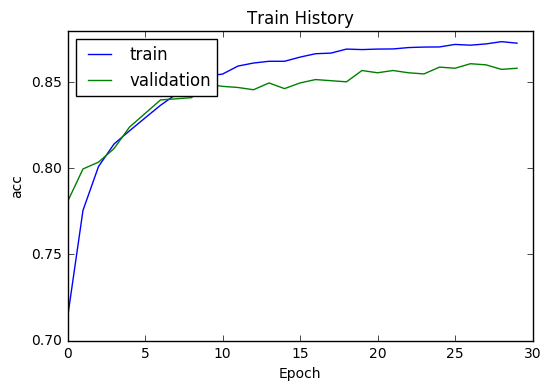

In [17]:
show_train_history(train_history,'acc','val_acc')

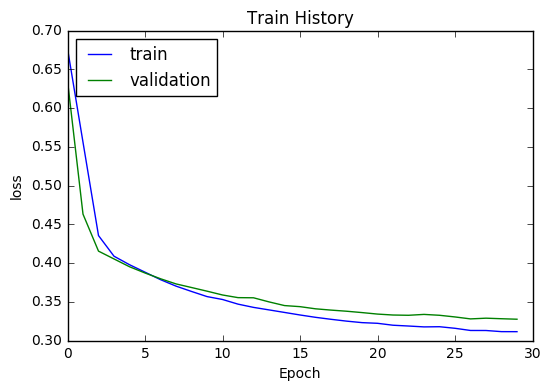

In [18]:
show_train_history(train_history,'loss','val_loss')

In [19]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 25us/step


In [20]:
scores[1]

0.8633017875293326